# Tutorial 8: on-ramp and off-ramps
____________________________________________________________________________________


## Overview
In this tutorial we present two components usually found along highways. Our interest in traffic lies more in the urban inner-town regions where these components are not quite common. Nonetheless, we have included them.

We admit that their display components are not very good and require improvement.

In [1]:
import __basik__ as bk

/home/dylan/Documents/Basik_Tutorial/__basik__/__init__.py:37: UserWarning: __basik__ has picked up that it is currently being run from within a Ipython or Jupyter Notebook. Display components requireQtA5gg to render. Most Ipython-based interactive notebooks havetheir kernel shut down when using QtA5gg as a Matplotlib backend. Hence, __basik__ will not use QtA5gg. As a result, please refrain from using __basik__ display components while in the Ipython or Jupyter Notebook environment. If display components are required, please use Ipython in a console. The Spyder IDE for Python is highly recommended.
  warnings.warn(message)


Importing matplotlib.pyplot as plt



#### Off-ramp
This is a region along a road (usually a highway) where a vehicle can choose to remain on the highway or to make a smooth transition off of it.

In our example, vehicles will move from South to North with an off-ramp to the West. Along the opposite lane of flow, we will have vehicles moving from North to South with no off-ramp. Only North and South will thus require source objects.

The results can be reproduced from `/Basik_Tutorial/Console_Scripts/off_ramp.py`

DISPLAY OFF
Setting up simulation...


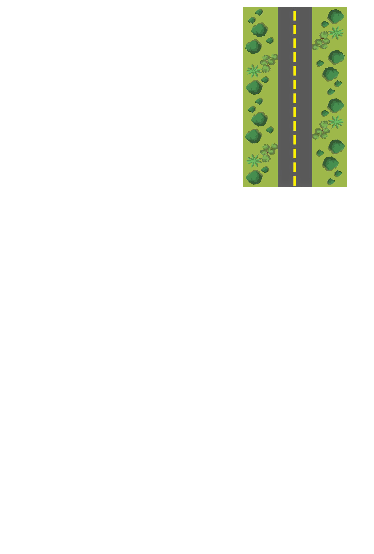

Scheduling Northern arrivals...
..done!
Scheduling Southern arrivals...
..done!


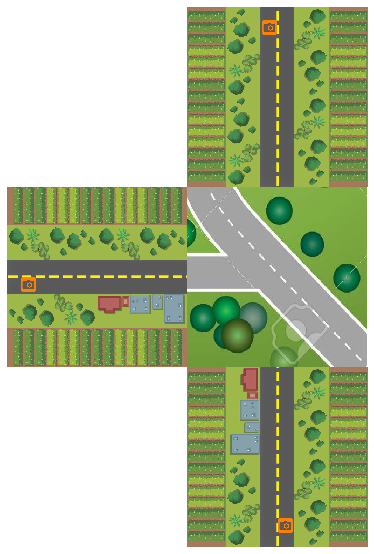

In [2]:
bk.VehicleDisplay.speed_up_factor = 10
bk.Vehicle.frames_per_move = 2
import numpy as np
bk.VehicleDisplay.SHOW = False # TURN OFF
print('DISPLAY OFF')
print('Setting up simulation...')
np.random.seed(123)
fig,ax = bk.axes_grid(3,2,scale=2.5)  
end_time = 20
lane_length = 5 
bk.Queue.clear()
# North:
Nlane_in = bk.Lane(lane_length) 
Nlane_out = bk.Lane(lane_length) 
NDisplay = bk.RoadDisplay(left_lane=Nlane_out,
                          right_lane=Nlane_in,
                          axes=ax[0,1],
                          horizontal=False)
Nrate = {end_time:bk.Rate(0.5)} 
Nsource = bk.Source(vehicle_velocity = 16.67,  
                    target_node = Nlane_in.IN,
                    rate_schedule=Nrate)
print('Scheduling Northern arrivals...')
Nsource.setup_arrivals(end_time)
print('..done!')
Nrecord = bk.Record(Nlane_out.OUT)
# South
Slane_in = bk.Lane(lane_length) 
Slane_out = bk.Lane(lane_length) 
SDisplay = bk.RoadDisplay(left_lane=Slane_in,
                          right_lane=Slane_out,
                          axes=ax[2,1],
                          horizontal=False)
Srate = {end_time:bk.Rate(0.9)} 
Ssource = bk.Source(vehicle_velocity = 16.67, 
                    target_node = Slane_in.IN,
                    rate_schedule=Srate)
print('Scheduling Southern arrivals...')
Ssource.setup_arrivals(end_time)
print('..done!')
Srecord = bk.Record(Slane_out.OUT)  
# West
Wlane_out = bk.Lane(lane_length)
WDisplay = bk.RoadDisplay(left_lane=None,
                          right_lane=Wlane_out,
                          axes=ax[1,0],
                          horizontal=True)
Wrecord = bk.Record(Wlane_out.OUT)
offramp = bk.OffRamp(offramp_lane_entrance=Slane_in.OUT,
                     offramp_lane_on_exit=Nlane_out.IN,
                     offramp_lane_off_exit=Wlane_out.IN,     # off_ramp_direction
                     standard_lane_entrance=Nlane_in.OUT,
                     standard_lane_exit=Slane_out.IN,
                     off_prob=0.5)

offrampdisplay = bk.OffRampDisplay(offramp,
                                  off_ramp_direction='W',
                                  axes=ax[1,1])
fig

In [3]:
print('Populating simulation...')
bk.Queue.run(end_time/2)
print('...done!')

Populating simulation...
...done!


Turning on display...
...done!
Performing simulation with display...
...done!


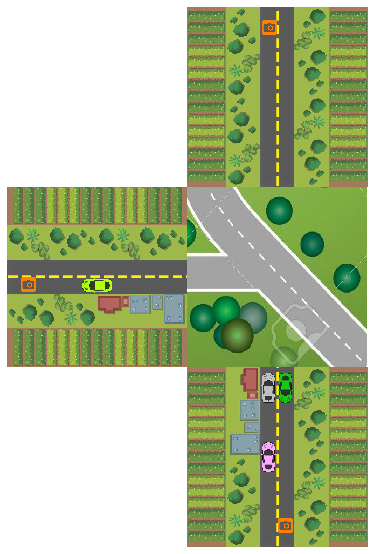

In [4]:
print('Turning on display...')
bk.VehicleDisplay.SHOW = True # TURN OFF
for component in bk.Queue.content:
    if isinstance(component,bk.Vehicle):  
        display = component.vehicle_display      
        display.show()
print('...done!')
start_time = bk.Queue.current_time
print('Performing simulation with display...')
#bk.Queue.run(end_time=end_time,
#            start_time=start_time)
print('...done!')
fig

In [5]:
from IPython.display import Video
import os
path = os.getcwd()+'/Videos/off_ramp.mp4'
video_width = 900  # 1024 default
video_height = 450  # 576 default
Video(path,embed=True,width=video_width,height=video_height)

### On-ramp
The on ramp object allows a branch of subordinate traffic flow to join with some main flow of traffic. The main flow is usually a high-way and always has priority over the subordinate flow at the point of intersection. Once a vehicle from the subordinate flow reaches the intersection point of the on-ramp, it must assess its immediate environment for 'right-of-way'. It requires a certain number of nodes to be cleared to the right of it. This along with the fact that the first nodes to the left of it is not occupied will allow it to pass/join the main flow. This is almost identical to the right-of-way assessment performed in the traffic circle. In fact they share the exact same function.

The results can be reproduced from `/Basik_Tutorial/Console_Scripts/on_ramp.py`.

DISPLAY OFF
Setting up simulation...


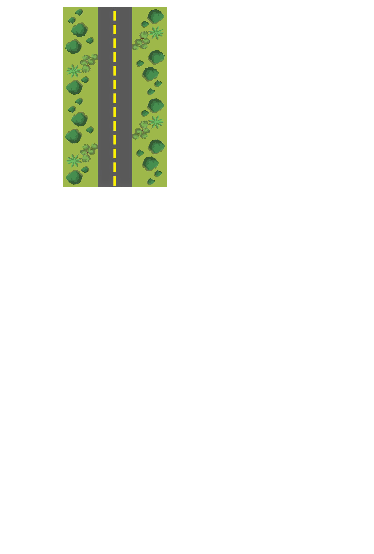

Scheduling Northern arrivals...
..done!
Scheduling Southern arrivals...
..done!
Scheduling Eastern arrivals...
..done!


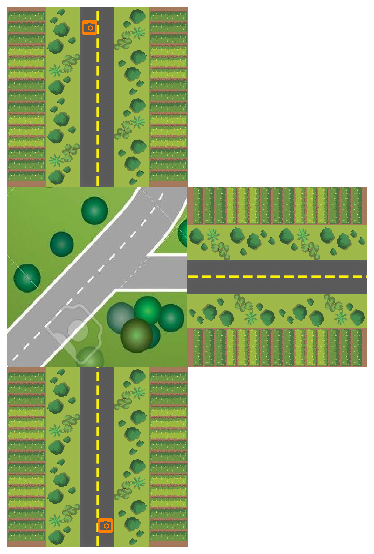

In [6]:
bk.VehicleDisplay.speed_up_factor = 10
bk.Vehicle.frames_per_move = 2
bk.VehicleDisplay.SHOW = False # TURN OFF
print('DISPLAY OFF')
print('Setting up simulation...')
np.random.seed(123)
fig,ax = bk.axes_grid(3,2,scale=2.5)  
end_time = 11.5
lane_length = 5 
bk.Queue.clear()
# North:
Nlane_in = bk.Lane(lane_length) 
Nlane_out = bk.Lane(lane_length) 
NDisplay = bk.RoadDisplay(left_lane=Nlane_out,
                          right_lane=Nlane_in,
                          axes=ax[0,0],
                          horizontal=False)
Nrate = {end_time:bk.Rate(1.0)} 
Nsource = bk.Source(vehicle_velocity = 16.67,  
                    target_node = Nlane_in.IN,
                    rate_schedule=Nrate)
print('Scheduling Northern arrivals...')
Nsource.setup_arrivals(end_time)
print('..done!')
Nrecord = bk.Record(Nlane_out.OUT)
# South
Slane_in = bk.Lane(lane_length) 
Slane_out = bk.Lane(lane_length) 
SDisplay = bk.RoadDisplay(left_lane=Slane_in,
                          right_lane=Slane_out,
                          axes=ax[2,0],
                          horizontal=False)
Srate = {end_time:bk.Rate(1.9)} 
Ssource = bk.Source(vehicle_velocity = 16.67, 
                    target_node = Slane_in.IN,
                    rate_schedule=Srate)
print('Scheduling Southern arrivals...')
Ssource.setup_arrivals(end_time)
print('..done!')
Srecord = bk.Record(Slane_out.OUT)  
# East

Elane_in = bk.Lane(lane_length)
SDisplay = bk.RoadDisplay(left_lane=None,
                          right_lane=Elane_in,
                          axes=ax[1,1],
                          horizontal=True)
Erate = {end_time:bk.Rate(0.6)} 
Esource = bk.Source(vehicle_velocity = 16.67, 
                    target_node = Elane_in.IN,
                    rate_schedule=Erate)
print('Scheduling Eastern arrivals...')
Esource.setup_arrivals(end_time)
print('..done!')
# On-ramp object
onramp = bk.OnRamp(main_flow_entrance=Slane_in.OUT,
                   sub_flow_entrance=Elane_in.OUT,   # on_ramp_direction
                   on_ramp_exit=Nlane_out.IN,
                   standard_lane_entrance=Nlane_in.OUT,
                   standard_lane_exit=Slane_out.IN)
        
onrampdisplay = bk.OnRampDisplay(onramp,
                                 on_ramp_direction='E',
                                 axes=ax[1,0])
fig

In [7]:
print('Populating simulation...')
bk.Queue.run(end_time/2)
print('...done!')

Populating simulation...
...done!


Turning on display...
...done!
Performing simulation with display...
...done!


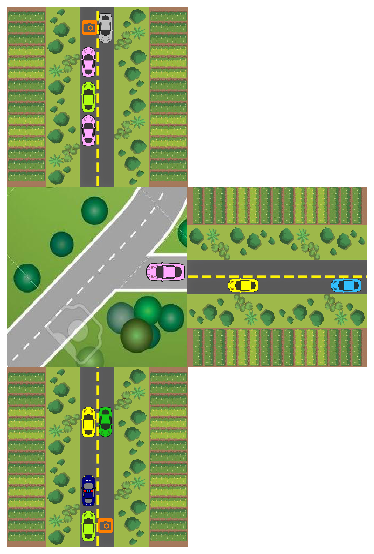

In [8]:
print('Turning on display...')
bk.VehicleDisplay.SHOW = True # TURN OFF
for component in bk.Queue.content:
    if isinstance(component,bk.Vehicle):  
        display = component.vehicle_display      
        display.show()
print('...done!')
start_time = bk.Queue.current_time
print('Performing simulation with display...')
#bk.Queue.run(end_time=end_time,
#            start_time=start_time)
print('...done!')
fig

In [9]:
path = os.getcwd()+'/Videos/on_ramp.mp4'
video_width = 900  # 1024 default
video_height = 450  # 576 default
Video(path,embed=True,width=video_width,height=video_height)

# Conclusion/Summary
We have introduced two objects that are mainly found along high-ways. These objects are intended to allow vehicles to transition smoothly. One would expect this to combat bursty behaviour in vehicle inter-arrival times. Hence, these objects are not of great interest to our particlar studies.

In the next tutorial, we will look at how to fine-tune vehicle behaviour.